In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read the CSV file into a DataFrame
df = pd.read_csv(r"C:/Users/Himanshu/Desktop/Datasets/iris.data")

# Define the column names
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

# Define the filename for the CSV file
filename = "iris_data.csv"

# Save the DataFrame as a CSV file with the specified column names
df.to_csv(filename, index=False, header=column_names)

# Read the CSV file back into a new DataFrame
iris_df = pd.read_csv(filename)

# Display the first few rows of the new DataFrame
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
iris_df.shape # Check the shape of the dataset

(149, 5)

In [7]:
iris_df.info()# display information about column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
iris_df.describe() # Display some basic statistics of the dataset

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris_df.isnull().sum() # Check for any missing values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
# Count the number of samples for each species
species_counts = iris_df['species'].value_counts()
print("\nNumber of samples for each species:")
print(species_counts)


Number of samples for each species:
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: species, dtype: int64


In [11]:
# Calculate the mean sepal length for each species
mean_sepal_length = iris_df.groupby('species')['sepal_length'].mean()
print("\nMean sepal length for each species:")
print(mean_sepal_length)


Mean sepal length for each species:
species
Iris-setosa        5.004082
Iris-versicolor    5.936000
Iris-virginica     6.588000
Name: sepal_length, dtype: float64


In [12]:
# Calculate the median petal width for each species
median_petal_width = iris_df.groupby('species')['petal_width'].median()
print("\nMedian petal width for each species:")
print(median_petal_width)


Median petal width for each species:
species
Iris-setosa        0.2
Iris-versicolor    1.3
Iris-virginica     2.0
Name: petal_width, dtype: float64


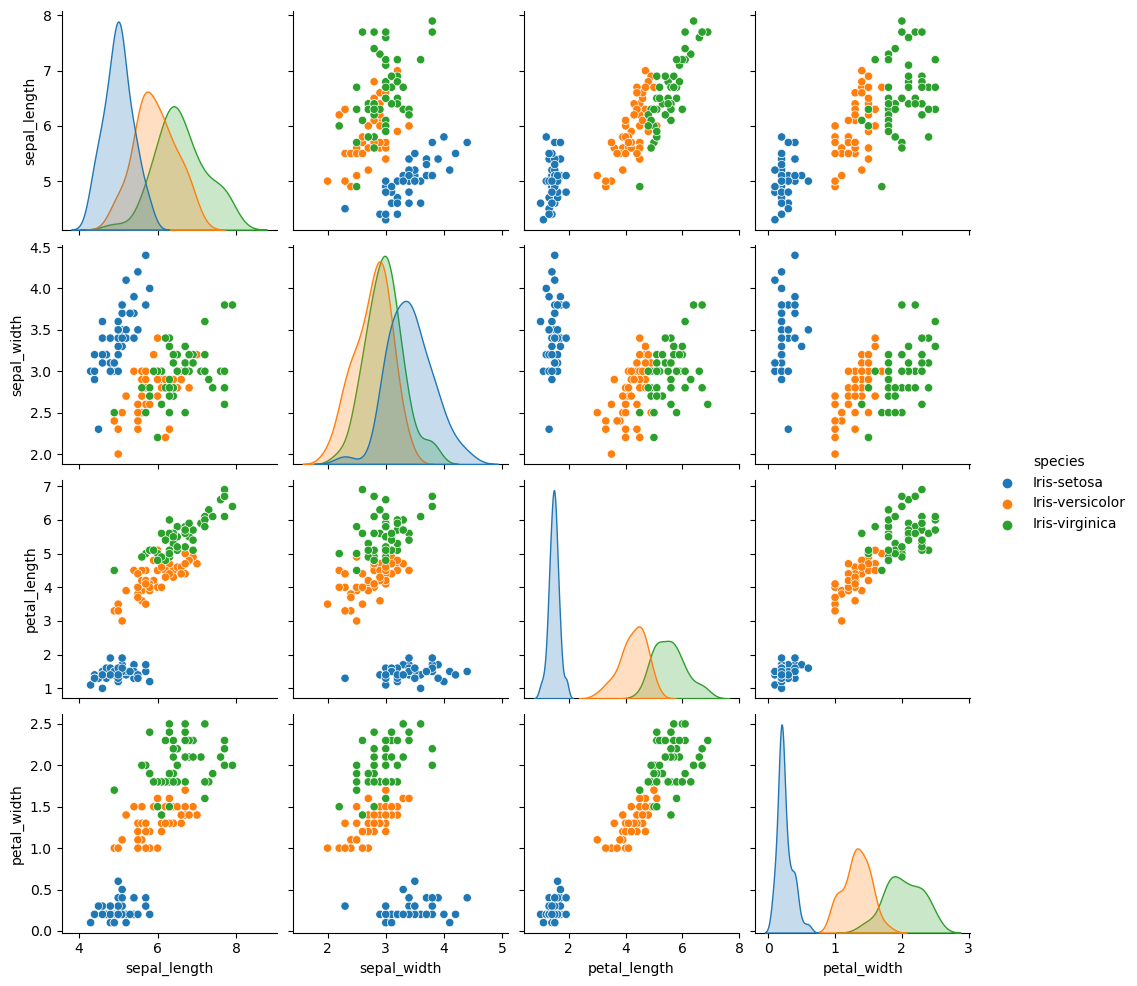

In [13]:
sns.pairplot(iris_df, hue='species')  # pair plot
plt.show()

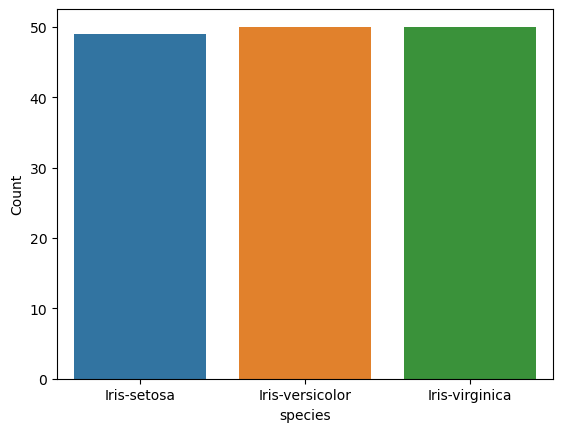

In [14]:
# Bar plot
sns.countplot(data=iris_df, x='species')
plt.xlabel('species')
plt.ylabel('Count')
plt.show()

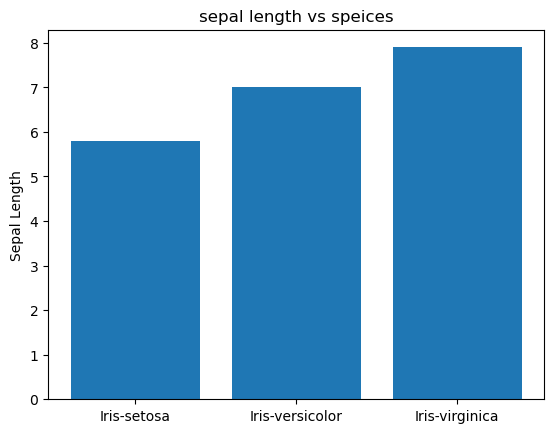

In [21]:
plt.bar(iris_df['species'],iris_df['sepal_length'])
plt.title("sepal length vs speices")
plt.ylabel('Sepal Length')
plt.show()

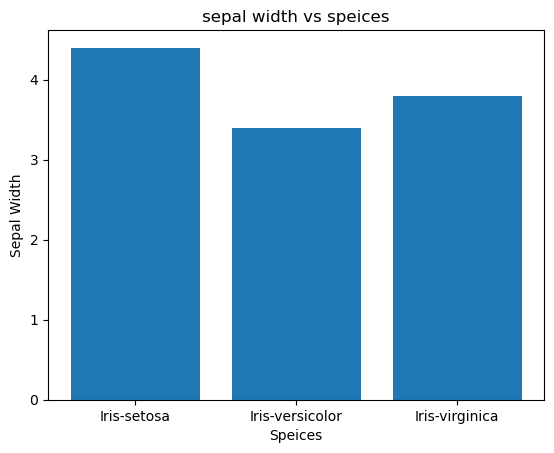

In [23]:
plt.bar(iris_df['species'],iris_df['sepal_width'])
plt.title("sepal width vs speices")
plt.xlabel('Speices')
plt.ylabel('Sepal Width')
plt.show()

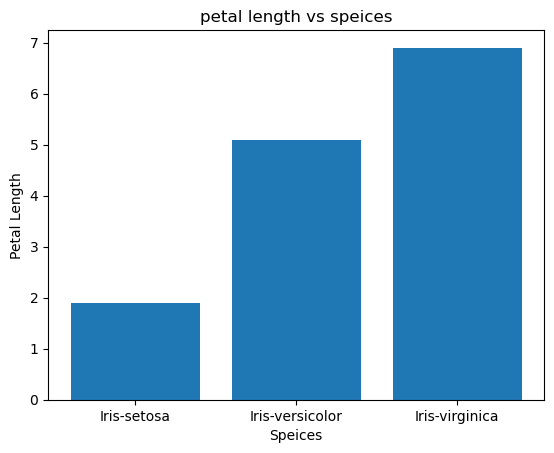

In [24]:
plt.bar(iris_df['species'],iris_df['petal_length'])
plt.title("petal length vs speices")
plt.xlabel('Speices')
plt.ylabel('Petal Length')
plt.show()

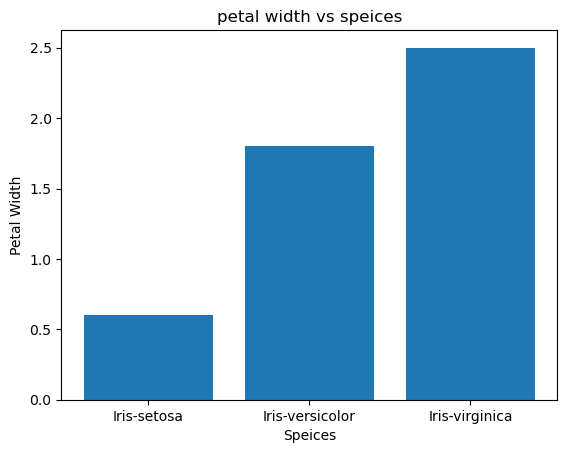

In [25]:
plt.bar(iris_df['species'],iris_df['petal_width'])
plt.title("petal width vs speices")
plt.xlabel('Speices')
plt.ylabel('Petal Width')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [42]:
# Separate the features (X) and the target variable (Y)
X = iris_df.drop('species', axis=1)
Y = iris_df['species']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.28, random_state=35)

print(X_train.shape)

print(X_test.shape)

print(Y_train.shape)

print(Y_test.shape)



(107, 4)
(42, 4)
(107,)
(42,)


In [43]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
model =LogisticRegression()  # Create a Logistic Regression model

 #Train the model on the training data
model.fit(X_train, Y_train)

LogisticRegression()

In [45]:
# Make predictions on the test data
Y_pred = model.predict(X_test)

In [46]:
# Calculate the training accuracy
train_accuracy = model.score(X_train, Y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9626168224299065


In [47]:
# Calculate the test accuracy
test_accuracy = model.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9761904761904762


### Final conclution
The training accuracy is 0.9626, and the test accuracy is 0.9761.

Based on these results, we can conclude that the logistic regression model performs very well on both the training and test data. The high training accuracy of 0.9626 indicates that the model fits the training data quite well and has learned the underlying patterns in the data.

The test accuracy of 0.9761 is slightly higher than the training accuracy. This suggests that the model generalizes well to unseen data and is able to make accurate predictions on new samples.

Overall, the model exhibits high accuracy on both the training and test data, which is a positive outcome. These results indicate that the logistic regression model is able to capture the relationships between the input features and the target variable effectively, leading to accurate predictions.

